In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc, font_manager
rc('font', family='NanumSquareR')

# 아파트 실거래가 예측 #

In [2]:
train = pd.read_csv('./apt train.csv')

In [62]:
test = pd.read_csv('./apt test.csv')

In [3]:
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
transaction_id            1216553 non-null int64
apartment_id              1216553 non-null int64
city                      1216553 non-null object
dong                      1216553 non-null object
jibun                     1216553 non-null object
apt                       1216553 non-null object
addr_kr                   1216553 non-null object
exclusive_use_area        1216553 non-null float64
year_of_completion        1216553 non-null int64
transaction_year_month    1216553 non-null int64
transaction_date          1216553 non-null object
floor                     1216553 non-null int64
transaction_real_price    1216553 non-null int64
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ MB


In [5]:
train['dong'].unique()
#동이 너무 많다 
#나중에 삭제 

array(['신교동', '필운동', '내수동', '인의동', '이화동', '명륜1가', '명륜2가', '창신동', '숭인동',
       '평창동', '무악동', '누상동', '수송동', '익선동', '동숭동', '부암동', '낙원동', '교북동',
       '행촌동', '신영동', '신문로1가', '청운동', '견지동', '사직동', '혜화동', '통인동', '명륜3가',
       '당주동', '구기동', '연건동', '충신동', '옥인동', '장충동2가', '신당동', '순화동', '중림동',
       '만리동1가', '회현동1가', '산림동', '남산동2가', '인현동2가', '묵정동', '흥인동', '충무로4가',
       '을지로5가', '황학동', '장충동1가', '정동', '필동3가', '만리동2가', '예장동', '필동1가',
       '남대문로5가', '회현동2가', '남창동', '오장동', '충무로5가', '후암동', '신창동', '산천동',
       '원효로4가', '효창동', '도원동', '문배동', '한강로2가', '한강로3가', '이촌동', '이태원동',
       '한남동', '서빙고동', '보광동', '동자동', '청파동1가', '용문동', '한강로1가', '청파동3가',
       '동빙고동', '원효로1가', '원효로2가', '청암동', '용산동2가', '용산동5가', '갈월동', '원효로3가',
       '주성동', '신계동', '하왕십리동', '홍익동', '마장동', '사근동', '행당동', '응봉동', '금호동1가',
       '금호동3가', '금호동4가', '옥수동', '성수동1가', '성수동2가', '용답동', '도선동', '송정동',
       '금호동2가', '상왕십리동', '중곡동', '구의동', '광장동', '자양동', '화양동', '군자동', '능동',
       '용두동', '제기동', '전농동', '답십리동', '장안동', '청량리동', '회기동', '휘경동', '이문

In [6]:
train['apartment_id']

0           7622
1           5399
2           3578
3          10957
4          10639
           ...  
1216548     9578
1216549     9578
1216550     9578
1216551     9586
1216552     9578
Name: apartment_id, Length: 1216553, dtype: int64

findfont: Font family ['NanumSquareR'] not found. Falling back to DejaVu Sans.


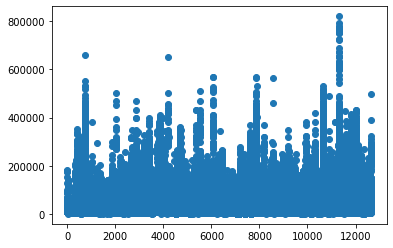

In [7]:
plt.scatter(train['apartment_id'], train['transaction_real_price'])

In [8]:
train['city']= pd.get_dummies(train['city'])
#서울 0 부산 1

In [9]:
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,0,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,0,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,0,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,0,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,0,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [10]:
train['transaction_date'].unique()

array(['21~31', '1~10', '11~20', '21~29', '21~30', '21~28'], dtype=object)

In [11]:
train.isnull().sum()

transaction_id            0
apartment_id              0
city                      0
dong                      0
jibun                     0
apt                       0
addr_kr                   0
exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
transaction_date          0
floor                     0
transaction_real_price    0
dtype: int64

### 거래날짜를 구간화

#### 다변량 범주들을 맵핑하는법 ####

In [12]:
train['transaction_date'].unique()

array(['21~31', '1~10', '11~20', '21~29', '21~30', '21~28'], dtype=object)

In [13]:
name_mapping = {'1~10': '1',"11~20" : '2', '21~28' :'3','21~29' : '3', '21~30' : '3', '21~31' : '3'}

In [14]:
name_mapping

{'1~10': '1',
 '11~20': '2',
 '21~28': '3',
 '21~29': '3',
 '21~30': '3',
 '21~31': '3'}

In [15]:
transaction_date1 = lambda x: name_mapping.get(x,x)

In [16]:
train['transaction_date1']=train.transaction_date.map(transaction_date1)

In [17]:
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,transaction_date1
0,0,7622,0,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500,3
1,1,5399,0,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000,1
2,2,3578,0,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500,1
3,3,10957,0,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000,2
4,4,10639,0,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000,3


In [18]:
train=train.drop('transaction_date',axis=1)

In [19]:
train['exclusive_use_area']=train['exclusive_use_area'].round()

In [20]:
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,transaction_date1
0,0,7622,0,신교동,6-13,신현(101동),신교동 6-13 신현(101동),85.0,2002,200801,2,37500,3
1,1,5399,0,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.0,1973,200801,6,20000,1
2,2,3578,0,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,85.0,2007,200801,6,38500,1
3,3,10957,0,내수동,95,파크팰리스,내수동 95 파크팰리스,146.0,2003,200801,15,118000,2
4,4,10639,0,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.0,2004,200801,3,120000,3


In [21]:
train['floor'].unique()

array([ 2,  6, 15,  3, 16,  7,  1,  5,  4, 12,  8, 14, 11, 13, 21, 18, 20,
        9, 10, 17, 23, 19, 28, 22, 25, 29, 30, 26, -1, 27, 24, 32, 33, 31,
       35, 37, 34, 36, 38, 39, 42, 40, 56, 47, 53, -2, 41, 46, 54, 45, 44,
       43, 48, 50, 51, 49, 57, 52, -3, -4, 60, 67, 63, 65, 64, 59, 68, 66,
       58, 62, 55, 69, 61, 70, 75, 76, 74, 73, 79, 72, 80, 78, 77, 71])

### 층을 구간화 

In [30]:
train.loc[train.floor<0]=0
#지하에 있는것들을 전부 0으로 변경 

TypeError: Cannot compare a Categorical for op __lt__ with a scalar, which is not a category.

In [31]:
train['floor'].unique()

[1, 2, 3, 4, 5, 6, 7, 8]
Categories (8, object): [1 < 2 < 3 < 4 < 5 < 6 < 7 < 8]

In [24]:
b=train['floor']

In [25]:
bins=[-1, 11, 21, 31, 41, 51, 61, 71, 81]
labels=['1','2','3','4','5','6','7','8']
a=pd.cut(b,bins,labels=labels)
a
#-1~11까지가 1 

0          1
1          1
2          1
3          2
4          1
          ..
1216548    1
1216549    1
1216550    1
1216551    1
1216552    2
Name: floor, Length: 1216553, dtype: category
Categories (8, object): [1 < 2 < 3 < 4 < 5 < 6 < 7 < 8]

In [26]:
a.unique()

[1, 2, 3, 4, 5, 6, 7, 8]
Categories (8, object): [1 < 2 < 3 < 4 < 5 < 6 < 7 < 8]

In [27]:
train=train.drop('floor',axis=1)

In [28]:
train['floor'] = a

In [29]:
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_real_price,transaction_date1,floor
0,0,7622,0,신교동,6-13,신현(101동),신교동 6-13 신현(101동),85.0,2002,200801,37500,3,1
1,1,5399,0,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.0,1973,200801,20000,1,1
2,2,3578,0,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,85.0,2007,200801,38500,1,1
3,3,10957,0,내수동,95,파크팰리스,내수동 95 파크팰리스,146.0,2003,200801,118000,2,2
4,4,10639,0,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.0,2004,200801,120000,3,1


### 거래발생시기를 년도로 구간화

In [32]:
train['transaction_year_month'].unique()

array([200801, 200802, 200803, 200804, 200805, 200806, 200807, 200808,
       200809, 200810, 200811, 200812, 200901, 200902, 200903, 200904,
       200905, 200906, 200907, 200908, 200909, 200910, 200911, 200912,
       201001, 201002, 201003, 201004, 201005, 201006, 201007, 201008,
       201009, 201010, 201011, 201012, 201101, 201102, 201103, 201104,
       201105, 201106, 201107, 201108, 201109,      0, 201110, 201111,
       201112, 201201, 201202, 201203, 201204, 201205, 201206, 201207,
       201208, 201209, 201210, 201211, 201212, 201301, 201302, 201303,
       201304, 201305, 201306, 201307, 201308, 201309, 201310, 201311,
       201312, 201401, 201402, 201403, 201404, 201405, 201406, 201407,
       201408, 201409, 201410, 201411, 201412, 201501, 201502, 201503,
       201504, 201505, 201506, 201507, 201508, 201509, 201510, 201511,
       201512, 201601, 201602, 201603, 201604, 201605, 201606, 201607,
       201608, 201609, 201610, 201611, 201612, 201701, 201702, 201703,
      

In [33]:
sum(train['transaction_year_month']==0)

168

In [34]:
bins=[-1,200800, 200901, 201001, 201101, 201201, 201301, 201401, 201501, 201601,201701,201801]
labels=['0','08','09','10','11','12','13','14','15','16','17']
b=pd.cut(train['transaction_year_month'],bins,labels=labels)
b
#-1~11까지가 1 
#transaction_year_month 컬럼에서 0이라는 데이터가 존재하는데 이것들은 전부 0으로 

0          08
1          08
2          08
3          08
4          08
           ..
1216548    17
1216549    17
1216550    17
1216551    17
1216552    17
Name: transaction_year_month, Length: 1216553, dtype: category
Categories (11, object): [0 < 08 < 09 < 10 ... 14 < 15 < 16 < 17]

In [35]:
b.isnull().sum()

0

In [36]:
train['transaction_year_month']=b

In [37]:
train[['transaction_year_month','transaction_real_price']]

,transaction_year_month,transaction_real_price
0,08,37500
1,08,20000
2,08,38500
3,08,118000
4,08,120000
...,...,...
1216548,17,22000
1216549,17,30750
1216550,17,29500
1216551,17,26700


In [38]:
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_real_price,transaction_date1,floor
0,0,7622,0,신교동,6-13,신현(101동),신교동 6-13 신현(101동),85.0,2002,08,37500,3,1
1,1,5399,0,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.0,1973,08,20000,1,1
2,2,3578,0,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,85.0,2007,08,38500,1,1
3,3,10957,0,내수동,95,파크팰리스,내수동 95 파크팰리스,146.0,2003,08,118000,2,2
4,4,10639,0,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.0,2004,08,120000,3,1


In [39]:
train.isnull().sum()

transaction_id            0
apartment_id              0
city                      0
dong                      0
jibun                     0
apt                       0
addr_kr                   0
exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
transaction_real_price    0
transaction_date1         0
floor                     0
dtype: int64

### 동, 지번, 아파트이름, 아파트 주소와 같은 문자열들은 범주화를 할 수 없을정도로 넓게 펴져있어서 삭제 
#### 다음번에는 다 넣어보고 한번 해보기 \

In [40]:
train=train.drop('dong', axis=1)
train=train.drop('apartment_id', axis=1)
train=train.drop('jibun', axis=1)
train=train.drop('apt', axis=1)
train=train.drop('addr_kr', axis=1)

In [41]:
train=train.drop('transaction_id', axis=1)

In [42]:
train.head()
#transaction_date도 삭제하면 좋을거같다 

,city,exclusive_use_area,year_of_completion,transaction_year_month,transaction_real_price,transaction_date1,floor
0,0,85.0,2002,08,37500,3,1
1,0,99.0,1973,08,20000,1,1
2,0,85.0,2007,08,38500,1,1
3,0,146.0,2003,08,118000,2,2
4,0,194.0,2004,08,120000,3,1


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 7 columns):
city                      1216553 non-null int64
exclusive_use_area        1216553 non-null float64
year_of_completion        1216553 non-null int64
transaction_year_month    1216553 non-null category
transaction_real_price    1216553 non-null int64
transaction_date1         1216553 non-null object
floor                     1216553 non-null category
dtypes: category(2), float64(1), int64(3), object(1)
memory usage: 48.7+ MB


In [44]:
train['exclusive_use_area']=train['exclusive_use_area'].astype(int)
train['transaction_year_month']=train['transaction_year_month'].astype(int)
train['floor']=train['floor'].astype(int)

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 7 columns):
city                      1216553 non-null int64
exclusive_use_area        1216553 non-null int64
year_of_completion        1216553 non-null int64
transaction_year_month    1216553 non-null int64
transaction_real_price    1216553 non-null int64
transaction_date1         1216553 non-null object
floor                     1216553 non-null int64
dtypes: int64(6), object(1)
memory usage: 65.0+ MB


In [46]:
train['transaction_date1']=train['transaction_date1'].astype(int)

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 7 columns):
city                      1216553 non-null int64
exclusive_use_area        1216553 non-null int64
year_of_completion        1216553 non-null int64
transaction_year_month    1216553 non-null int64
transaction_real_price    1216553 non-null int64
transaction_date1         1216553 non-null int64
floor                     1216553 non-null int64
dtypes: int64(7)
memory usage: 65.0 MB


### 테스트 데이터도 트레이닝데이터와 똑같이 만들기 

In [63]:
test['city']= pd.get_dummies(test['city'])

In [64]:
test['transaction_date1']=test.transaction_date.map(transaction_date1)

In [65]:
test=test.drop('transaction_date',axis=1)

In [66]:
test['exclusive_use_area']=test['exclusive_use_area'].round()

In [67]:
test.loc[test.floor<0]=0

In [68]:
f=test['floor']
bins=[-1, 11, 21, 31, 41, 51, 61, 71, 81]
labels=['1','2','3','4','5','6','7','8']
e=pd.cut(f,bins,labels=labels)
e

0       1
1       1
2       1
3       1
4       2
       ..
5458    1
5459    1
5460    3
5461    1
5462    1
Name: floor, Length: 5463, dtype: category
Categories (8, object): [1 < 2 < 3 < 4 < 5 < 6 < 7 < 8]

In [69]:
test=test.drop('floor',axis=1)
test['floor']= e

In [70]:
sum(test['transaction_year_month']==0)

2

In [71]:
bins=[-1,200800, 200901, 201001, 201101, 201201, 201301, 201401, 201501, 201601,201701,201801]
labels=['0','08','09','10','11','12','13','14','15','16','17']
g=pd.cut(test['transaction_year_month'],bins,labels=labels)
g

0       17
1       17
2       17
3       17
4       17
        ..
5458    17
5459    17
5460    17
5461    17
5462    17
Name: transaction_year_month, Length: 5463, dtype: category
Categories (11, object): [0 < 08 < 09 < 10 ... 14 < 15 < 16 < 17]

In [72]:
test['transaction_year_month']=b

In [73]:
test=test.drop('dong', axis=1)
test=test.drop('apartment_id', axis=1)
test=test.drop('jibun', axis=1)
test=test.drop('apt', axis=1)
test=test.drop('addr_kr', axis=1)
test=test.drop('transaction_id', axis=1)

In [74]:
test['exclusive_use_area']=test['exclusive_use_area'].astype(int)
test['transaction_date1']=test['transaction_date1'].astype(int)
test['floor']=test['floor'].astype(int)
test['city']=test['city'].astype(int)

In [75]:
test

,city,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date1,floor
0,0,36,2002,08,2,1
1,1,69,1977,08,3,1
2,1,73,1989,08,2,1
3,0,112,2004,08,1,1
4,1,120,2014,08,2,2
...,...,...,...,...,...,...
5458,0,84,2003,08,2,1
5459,0,85,2009,08,1,1
5460,0,110,2004,08,3,3
5461,0,92,2005,08,3,1


### 정규화
#### 하지않으면 수치가 큰 데이터가 결과에 큰 영향을 주어 좋지못한 결과가 나온다

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
import statsmodels.api as sm

In [48]:
train

,city,exclusive_use_area,year_of_completion,transaction_year_month,transaction_real_price,transaction_date1,floor
0,0,85,2002,8,37500,3,1
1,0,99,1973,8,20000,1,1
2,0,85,2007,8,38500,1,1
3,0,146,2003,8,118000,2,2
4,0,194,2004,8,120000,3,1
...,...,...,...,...,...,...,...
1216548,1,60,2012,17,22000,2,1
1216549,1,85,2012,17,30750,3,1
1216550,1,85,2012,17,29500,3,1
1216551,1,102,2008,17,26700,3,1


In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train1=train.copy()
train1[:]=scaler.fit_transform(train1[:])
#이 코드를 사용하면 데이터들을 0~1사이로 변환할 수 있다

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
test1=test.copy()
test1[:]=scaler.fit_transform(test1[:])

In [57]:
train1.head()

,city,exclusive_use_area,year_of_completion,transaction_year_month,transaction_real_price,transaction_date1,floor
0,0.0,0.200472,0.992563,0.470588,0.045732,1.000000,0.000000
1,0.0,0.233491,0.978185,0.470588,0.024390,0.333333,0.000000
2,0.0,0.200472,0.995042,0.470588,0.046951,0.333333,0.000000
3,0.0,0.344340,0.993059,0.470588,0.143902,0.666667,0.142857
4,0.0,0.457547,0.993555,0.470588,0.146341,1.000000,0.000000


In [77]:
test1.head()

,city,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date1,floor
0,0.0,0.131387,0.992563,0.5,0.666667,0.0
1,1.0,0.251825,0.980169,0.5,1.000000,0.0
2,1.0,0.266423,0.986118,0.5,0.666667,0.0
3,0.0,0.408759,0.993555,0.5,0.333333,0.0
4,1.0,0.437956,0.998513,0.5,0.666667,0.2


model = sm.OLS.from_formula(
    "Y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9)", data=train1)
result1 = model.fit()
result1.params

### Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
train.columns

Index(['city', 'exclusive_use_area', 'year_of_completion',
       'transaction_year_month', 'transaction_real_price', 'transaction_date1',
       'floor'],
      dtype='object')

In [59]:
Y=train1['transaction_real_price']
x=train1[['city', 'exclusive_use_area', 'year_of_completion',
       'transaction_year_month','transaction_date1',
       'floor']]

## ==================

In [79]:
rf=RandomForestRegressor(n_estimators=500)

In [95]:
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [132]:
train=train
test=test
y_train=train['transaction_real_price']
X_train=train[['city', 'exclusive_use_area', 'year_of_completion',
       'transaction_year_month','transaction_date1',
       'floor']]

y_test=test['transaction_real_price']
X_test=test[['city', 'exclusive_use_area', 'year_of_completion',
       'transaction_year_month','transaction_date1',
       'floor']]

In [134]:
rf=RandomForestRegressor(n_estimators=500)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [135]:
pred=rf.predict(X_test)
real=test['transaction_real_price']

In [136]:
from sklearn.metrics import mean_squared_error
mean_squared_error(real,pred)**0.5

50792.33614060205

## =========================

### 아마도 test에 real price를 0으로 둬서 이렇게 된거같다 
#### 그냥 train셋을 70:30으로 나누어서 진행 

In [48]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, Y_train1, Y_test1 = train1_test1_split(x,Y, test_size = 0.3, random_state=10)
print(len(x_train1))
print(len(x_test1))
print(len(Y_train1))
print(len(Y_test1))

851587
364966
851587
364966


In [49]:
rf=RandomForestRegressor(n_estimators=50)

In [50]:
rf.fit(x_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [51]:
pred=rf.predict(x_test)
real=Y_test

In [52]:
from sklearn.metrics import mean_squared_error
mean_squared_error(real,pred)**0.5

12164.908802239324

In [53]:
mean_squared_error(real,pred,sample_weight=x_test['year_of_completion'])**0.5

12170.075645639325

In [54]:
x_test.columns

Index(['city', 'exclusive_use_area', 'year_of_completion',
       'transaction_year_month', 'transaction_date1', 'floor'],
      dtype='object')

In [55]:
mean_squared_error(real,pred,sample_weight=x_test['exclusive_use_area'])**0.5

13969.16525303259

In [56]:
mean_squared_error(real,pred,sample_weight=x_test['floor'])**0.5

12317.74936045582

In [57]:
mean_squared_error(real,pred,sample_weight=x_test['city'])**0.5

4735.948304988542

#### 가중치를 도시별로 두었을때가 가장 예측결과가 좋다 

### Light GBM

In [59]:
import lightgbm as lgb
param = {'num_leaves' : 100, 
         'min_data_in_leaf' : 30,
         'objective' : 'regression',
         'max_depth' : 6,
         'learning_rate' : 0.02,
         'boosting' : 'gbdt',
         'feature_fraction' : 0.7522,
         'bagging_freq' : 1,
         'bagging_fraction' : 0.7083,
         'bagging_seed' : 11,
         'metric' : 'rmse',
         'random_state': 2019} 

trn_data = lgb.Dataset(x_train, label=Y_train,weight=x_train['city']) #weight=train['AB']
num_round = 1000
clf = lgb.train(param, trn_data, num_round, valid_sets=[trn_data], verbose_eval=100, early_stopping_rounds = 200)

/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


Training until validation scores don't improve for 200 rounds
[100]	training's rmse: 6216.7
[200]	training's rmse: 5556.17
[300]	training's rmse: 5392.66
[400]	training's rmse: 5313.34
[500]	training's rmse: 5242.24
[600]	training's rmse: 5185.74
[700]	training's rmse: 5132.6
[800]	training's rmse: 5089.99
[900]	training's rmse: 5055.32
[1000]	training's rmse: 5028.48
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 5028.48


In [60]:
predictions = clf.predict(x_test, num_iteration=clf.best_iteration)

In [61]:
predictions

array([27198.02062329, 15001.35297394, 12886.21980393, ...,
       17078.86670945, 18432.68890884, 77128.63487475])

In [62]:
Y_test

421791      64500
247552      20000
269360      18000
300405      76100
596024      97000
            ...  
590773      40000
1049676     13500
164953      20400
189900      54500
34885      310000
Name: transaction_real_price, Length: 364966, dtype: int64

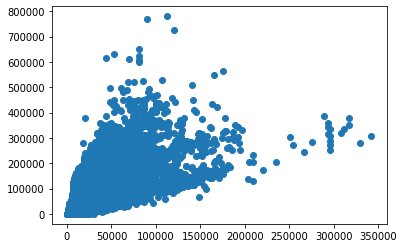

In [64]:
plt.scatter(predictions,Y_test)

### 결론 city를 가중치로 두었을때 랜덤포레스트가 Light GBM보다 예측성능이 좋다
#### 왜 좋은지는 잘모르겠음

### XGBOOST

In [ ]:
from xgboost import plot_importance
from xgboost import XGBClassifier